In [1]:
from sklearn.datasets import fetch_mldata
import sklearn.svm as svm

from sklearn.model_selection import train_test_split
import numpy as npy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score,zero_one_loss


mnist=fetch_mldata('MNIST original',data_home=".")
sampleIndex=npy.random.randint(70000,size=5000)
baseData=mnist.data[sampleIndex]
# # baseData=mnist.data
baseTarget=mnist.target[sampleIndex]
# # baseTarget=mnist.target
dataTrain,dataTest,targetTrain,targetTest=train_test_split(baseData,baseTarget,train_size=0.7)

print(len(dataTrain),len(dataTest))
print(len(targetTrain==1))

3500 1500
3500


/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Scoring Kernel's Mode

In [ ]:
import time
kernelModeList=['linear','poly','rbf','sigmoid']

summaryList=[]
for mode in kernelModeList :
    print(mode)
    summary={}
    summary['mode']=mode
    startTime=time.time()
    classifier=svm.SVC(kernel=mode)
    classifier.fit(dataTrain,targetTrain)
    print(time.time()-startTime)
    summary['time']= time.time() - startTime
    summary['score']=classifier.score(dataTest,targetTest)
    summaryList.append(summary)

linear
2.4007351398468018
poly
3.1570019721984863
rbf


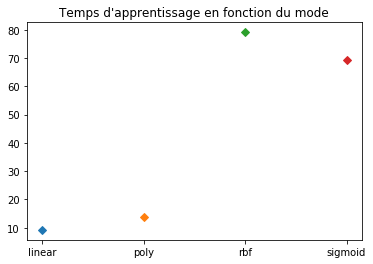

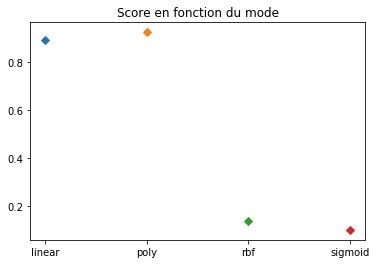

In [32]:
import time
import matplotlib.pyplot as plt


for dico,index in zip(summaryList,range(4)) :
#     print(dico,index)
    plt.plot(index,dico['time'],marker="D")
    
plt.xticks([0,1,2,3], kernelModeList)
plt.title("Temps d'apprentissage en fonction du mode")
plt.show()

for dico,index in zip(summaryList,range(4)) :
#     print(dico,index)
    plt.plot(index,dico['score'],marker="D")
    
plt.xticks([0,1,2,3], kernelModeList)
plt.title("Score en fonction du mode")
plt.show()


## Variation du paramètre de tolérance aux erreurs C

In [48]:
bestMode="linear"

summaryList=[]
for cValue in npy.linspace(1,1000,9):
    startTime=time.time()
    dico={}
    classifier=svm.SVC(kernel=bestMode,C=cValue)
    classifier.fit(dataTrain,targetTrain)
    score=classifier.score(dataTest,targetTest)
    eTime=time.time()-startTime
    dico['cValue']=cValue
    dico['score']=score
    dico['time']=eTime
    print(cValue,score,eTime)
    summaryList.append(dico)

1.0 0.894 15.878157138824463
125.875 0.894 16.61961603164673
250.75 0.894 15.486047267913818
375.625 0.894 17.13124680519104
500.5 0.894 15.606761932373047
625.375 0.894 15.70910358428955
750.25 0.894 15.910830020904541
875.125 0.894 16.34140372276306
1000.0 0.894 15.990520477294922


In [59]:
import matplotlib.pyplot as plt

for dico in summaryList :
#     print(dico,index)
    plt.plot(dico['cValue'],dico['score'],marker="D")
    
plt.title("Influence du C sur le score")
plt.show()

KeyError: 'cValue'

## Variation du paramètre Gamma
- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

In [58]:
summaryList=[]
for gamma in npy.linspace(1,1000,10):
    startTime=time.time()
    dico={}
    classifier=svm.SVC(kernel=bestMode,gamma=gamma)
    classifier.fit(dataTrain,targetTrain)
    score=classifier.score(dataTest,targetTest)
    eTime=time.time()-startTime
    dico['gamma']=gamma
    dico['score']=score
    dico['time']=eTime
    print(gamma,score,eTime)
    summaryList.append(dico)

1.0 0.894 14.81909728050232
112.0 0.894 15.951354503631592
223.0 0.894 16.79840397834778
334.0 0.894 16.528911113739014
445.0 0.894 15.273550510406494
556.0 0.894 15.273942708969116
667.0 0.894 16.406985998153687
778.0 0.894 15.44303011894226
889.0 0.894 15.850804328918457
1000.0 0.894 16.511123657226562


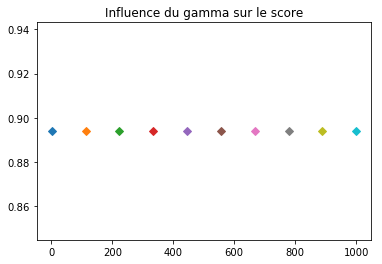

In [61]:
import matplotlib.pyplot as plt

for dico in summaryList :
#     print(dico,index)
    plt.plot(dico['gamma'],dico['score'],marker="D")
    
plt.title("Influence du gamma sur le score")
plt.show()

## GridSearchCV
#####
- puce


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10], 'kernel': ['linear','poly']},
 ]

clf = GridSearchCV(svm.SVC(),param_grid, cv=5)
clf.fit(dataTrain, targetTrain)

print(clf.best_estimator_)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [73]:
from sklearn.metrics import confusion_matrix 
summaryList=[]

print(bestMode)
startTime=time.time()
classifier=svm.SVC(kernel=bestMode)
classifier.fit(dataTrain,targetTrain)
predictedData=classifier.predict(dataTest)
print(predictedData)
matrice=confusion_matrix(targetTest,predictedData)
print(matrice)
print(time.time()-startTime)


linear
[ 9.  8.  9. ...,  4.  4.  9.]
[[132   0   1   0   0   4   1   1   1   0]
 [  0 151   4   0   0   0   0   1   2   0]
 [  1   3 147   2   2   2   1   1   3   0]
 [  0   2   7 127   0  12   1   2   6   1]
 [  0   1   0   0 136   0   1   2   0   4]
 [  1   0   2   6   2 112   4   1   2   3]
 [  1   0   4   1   3   5 132   0   0   0]
 [  0   0   2   3   0   1   0 140   0   3]
 [  0   2   2   4   8   3   1   0 126   4]
 [  1   1   1   2   5   0   0  11   1 138]]
17.03404951095581


In [80]:
print(matrice)

for num in range(10):
    good=matrice[num][num]
    missed=sum(matrice[num])-good
    print(num,good,missed,missed/good,sep="\t")

    Changement test

[[132   0   1   0   0   4   1   1   1   0]
 [  0 151   4   0   0   0   0   1   2   0]
 [  1   3 147   2   2   2   1   1   3   0]
 [  0   2   7 127   0  12   1   2   6   1]
 [  0   1   0   0 136   0   1   2   0   4]
 [  1   0   2   6   2 112   4   1   2   3]
 [  1   0   4   1   3   5 132   0   0   0]
 [  0   0   2   3   0   1   0 140   0   3]
 [  0   2   2   4   8   3   1   0 126   4]
 [  1   1   1   2   5   0   0  11   1 138]]
0	132	8	0.0606060606061
1	151	7	0.046357615894
2	147	15	0.102040816327
3	127	31	0.244094488189
4	136	8	0.0588235294118
5	112	21	0.1875
6	132	14	0.106060606061
7	140	9	0.0642857142857
8	126	24	0.190476190476
9	138	22	0.159420289855
